In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
path = "/Users/rajeshr/Desktop/Assignment1/Group22/Classification/NLS_Group22.txt"

In [3]:
data = pd.read_csv(path, header=None, delimiter=" ")
data = pd.DataFrame(data)
data = data.drop([2], axis=1)

In [4]:
class1 = data.iloc[:500]
class2 = data.iloc[501:1000]
class3 = data.iloc[1001:2000]

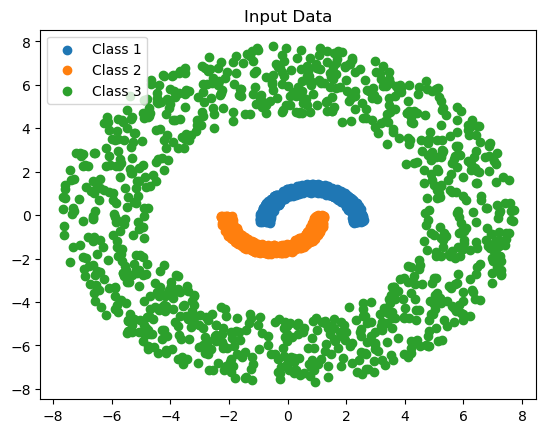

In [5]:
plt.scatter(class1[0], class1[1])
plt.scatter(class2[0], class2[1])
plt.scatter(class3[0], class3[1])

plt.legend(['Class 1','Class 2','Class 3'])
plt.title("Input Data")
plt.show()

In [6]:
def split_data(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    print(l1, l2)
    training = data.iloc[:l1]
    validation = data.iloc[l1:l2]
    test = data.iloc[l2:m]
    
    return training, validation, test

In [7]:
training1, validation1, test1 = split_data(class1)
training2, validation2, test2 = split_data(class2)
training3, validation3, test3 = split_data(class3)

300 400
299 398
599 798


In [8]:
tr1, tr2 = len(training1), len(training2)
v1, v2 = len(validation1), len(validation2)
t1, t2 = len(test1), len(test2)

In [9]:
training = training1.append(training2, ignore_index=True)
training = training.append(training3, ignore_index=True)

validation = validation1.append(validation2, ignore_index=True)
validation = validation.append(validation3, ignore_index=True)

test = test1.append(test2, ignore_index=True)
test = test.append(test3, ignore_index=True)

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-(x)))

def inst_error(y, yp):
    return sum(0.5*(y-yp)**2)

In [12]:
def train_data(xn, l1, l2):

    wh1 = 0.10*np.random.randn(3, 64)
    wh2 = 0.10*np.random.randn(64, 64)
    wo = 0.10*np.random.randn(64, 3)
    avg_err = []
    epoch = 1000
    
    while(epoch):
    
        err = []
        c1, c2, c3 = 0, 0, 0
        
        for i in range(len(xn)):

            xi = [1, xn.iat[i,0], xn.iat[i,1]] #Input layer
            #--------------------------
            h1 = np.dot(wh1.T, xi) #hidden layer 1 out
            a1 = sigmoid(h1) #hidden layer 1 activation out
            #--------------------------
            h2 = np.dot(wh2.T, a1) #hidden layer 2 out
            a2 = sigmoid(h2) #hidden layer 2 activation out
            #--------------------------
            out = np.dot(wo.T, a2) #Output layer out
            ao = sigmoid(out) #Output activation 
            #--------------------------

            if i<l1:
                y = [1, 0, 0]
                en = inst_error(y, ao)
                c1+=1
            elif i>=l1 and i<(l1+l2):
                y = [0, 1, 0]
                en = inst_error(y, ao)
                c2+=1
            else:
                y = [0, 0, 1]
                en = inst_error(y, ao)
                c3+=1
                
                
            err.append(en)
            neta = 0.01
            
            #Update weights
            wo = wo + (neta * np.outer(a2, ((y-ao) * ao * (1-ao))))
            
            var1 = np.dot(wo, ((y-ao) * ao * (1-ao)))
            var2 = a2 * (1-a2)
            wh2 = wh2 + (neta * np.outer(a1, var1*var2))
            
            var3 = var1*var2
            var4 = np.dot(wh2, var3)
            var5 = a1 * (1-a1)
            wh1 = wh1 + (neta * np.outer(xi, var4*var5))

            
        avg_error = sum(err)/len(err)
        avg_err.append(avg_error)
        if epoch%10==0:
            print("ERROR: ",avg_error)
        epoch -= 1
    
    print(c1, c2, c3)
    return wh1, wh2, wo

wh1, wh2, wo = train_data(training, tr1, tr2)

ERROR:  0.14293273021484962
ERROR:  0.1992637568899296
ERROR:  0.1959312106356792
ERROR:  0.19767364944170254
ERROR:  0.2002871997033362
ERROR:  0.19612798720099248
ERROR:  0.181483141120355
ERROR:  0.15438881053448117
ERROR:  0.12638969370722913
ERROR:  0.10877054619019835
ERROR:  0.09672666769906726
ERROR:  0.08653063369006783
ERROR:  0.07783790992665535
ERROR:  0.0714714718661208
ERROR:  0.06537947687852921
ERROR:  0.05797555579204345
ERROR:  0.04947273680683835
ERROR:  0.04110615464873122
ERROR:  0.03424848313826534
ERROR:  0.029488170355898662
ERROR:  0.02660961268252175
ERROR:  0.024852536775756086
ERROR:  0.02368676355800591
ERROR:  0.02286246499622003
ERROR:  0.022252915849403906
ERROR:  0.02178643483514337
ERROR:  0.021419230313232607
ERROR:  0.021123066004314447
ERROR:  0.02087896378455708
ERROR:  0.020673707575288823
ERROR:  0.020497781236977906
ERROR:  0.020344087970853766
ERROR:  0.02020710781128181
ERROR:  0.020082295525985908
ERROR:  0.019965590678098454
ERROR:  0.019852

In [13]:
def test_data(wh1, wh2, wo, xn):
    pred_out = []
    for i in range(len(xn)):
        
        xi = [1, xn.iat[i,0], xn.iat[i,1]]
        
        h1 = np.dot(wh1.T, xi)
        a1 = sigmoid(h1)
        
        h2 = np.dot(wh2.T, a1)
        a2 = sigmoid(h2)

        out = np.dot(wo.T, a2) 
        ao = sigmoid(out)
        
        pred_out.append(ao)
        
    return np.round(np.array(pred_out))

In [14]:
all_points = []
for i in range(-10, 11):
    for j in range(-10, 11):
        all_points.append([i, j])
        
all_points = pd.DataFrame(all_points)

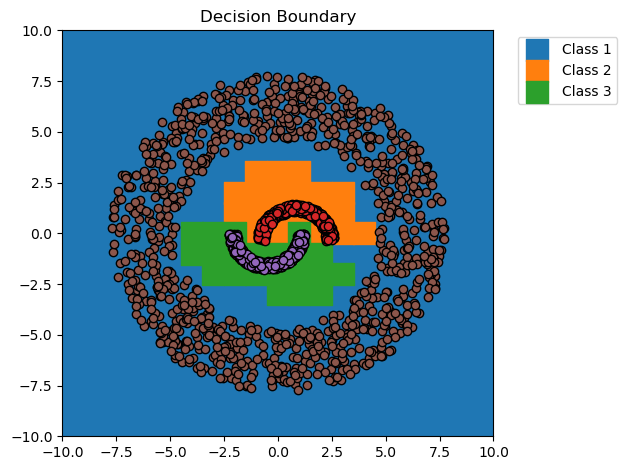

In [16]:
y = test_data(wh1, wh2, wo, all_points)

c1x, c2x, c3x = [], [], []
c1y, c2y, c3y = [], [], []

for i in range(len(all_points)):
        
    if y[i][0] == 1:
        c1x.append(all_points.iloc[i, 0])
        c1y.append(all_points.iloc[i, 1])
    elif y[i][1] == 1:
        c2x.append(all_points.iloc[i, 0])
        c2y.append(all_points.iloc[i, 1])
    else:
        c3x.append(all_points.iloc[i, 0])
        c3y.append(all_points.iloc[i, 1])
    

plt.scatter(c3x, c3y, marker='s', s=250)
plt.scatter(c1x, c1y, marker='s', s=250)
plt.scatter(c2x, c2y, marker='s', s=250)




plt.legend(['Class 2','Class 3', 'Class 1'])
plt.legend(['Class 1','Class 2', 'Class 3'], bbox_to_anchor=(1.04,1), loc="upper left")


plt.scatter(class1[0], class1[1], edgecolors='black')
plt.scatter(class2[0], class2[1], edgecolors='black')
plt.scatter(class3[0], class3[1], edgecolors='black')

plt.title("Decision Boundary")
plt.tight_layout()
plt.savefig("/Users/rajeshr/Desktop/fcnndecisionboundary.png")
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()